In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set()

In [4]:
df = pd.read_csv('/Users/daviderickson/projects/datasf/data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [5]:
df.shape

(2215024, 33)

In [6]:
print(df.columns)

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       ':@computed_region_yftq_j783', ':@computed_region_p5aj_wyqh',
       ':@computed_region_rxqg_mtj9', ':@computed_region_bh8s_q3mv',
       ':@computed_region_fyvs_ahh9', ':@computed_region_9dfj_4gjx',
       ':@computed_region_n4xg_c4py', ':@computed_region_4isq_27mq',
       ':@computed_region_fcz8_est8', ':@computed_region_pigm_ib2e',
       ':@computed_region_9jxd_iqea', ':@computed_region_6pnf_4xz7',
       ':@computed_region_6ezc_tdp2', ':@computed_region_h4ep_8xdi',
       ':@computed_region_nqbw_i6c3', ':@computed_region_2dwj_jsy4'],
      dtype='object')


In [7]:
df.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,...,:@computed_region_n4xg_c4py,:@computed_region_4isq_27mq,:@computed_region_fcz8_est8,:@computed_region_pigm_ib2e,:@computed_region_9jxd_iqea,:@computed_region_6pnf_4xz7,:@computed_region_6ezc_tdp2,:@computed_region_h4ep_8xdi,:@computed_region_nqbw_i6c3,:@computed_region_2dwj_jsy4
0,180362289,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,05/15/2018,10:30,SOUTHERN,NONE,700 Block of TEHAMA ST,-122.411912,...,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN
1,180360948,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Tuesday,05/15/2018,04:14,SOUTHERN,NONE,MARKET ST / SOUTH VAN NESS AV,-122.419258,...,1.0,NaN,1.0,NaN,8.0,2.0,1.0,1.0,1.0,NaN
2,180360879,OTHER OFFENSES,PAROLE VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,...,NaN,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN
3,180360879,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,...,NaN,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN
4,180360879,OTHER OFFENSES,TRAFFIC VIOLATION,Tuesday,05/15/2018,02:01,MISSION,"ARREST, BOOKED",CAPP ST / 21ST ST,-122.417813,...,NaN,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN


In [8]:
df[['Address', 'X', 'Y', 'Location', 'PdId',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods']].head(5)

,Address,X,Y,Location,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,700 Block of TEHAMA ST,-122.411912,37.775207,"(37.77520656149669, -122.41191202732877)",18036228907023,32.0,1.0,10.0,34.0
1,MARKET ST / SOUTH VAN NESS AV,-122.419258,37.775146,"(37.77514629165388, -122.41925789481357)",18036094864020,32.0,1.0,10.0,20.0
2,CAPP ST / 21ST ST,-122.417813,37.757101,"(37.757100579642824, -122.41781255878655)",18036087926150,53.0,3.0,2.0,20.0
3,CAPP ST / 21ST ST,-122.417813,37.757101,"(37.757100579642824, -122.41781255878655)",18036087965010,53.0,3.0,2.0,20.0
4,CAPP ST / 21ST ST,-122.417813,37.757101,"(37.757100579642824, -122.41781255878655)",18036087965015,53.0,3.0,2.0,20.0


In [9]:
df.describe()

,IncidntNum,X,Y,PdId,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,:@computed_region_yftq_j783,:@computed_region_p5aj_wyqh,...,:@computed_region_n4xg_c4py,:@computed_region_4isq_27mq,:@computed_region_fcz8_est8,:@computed_region_pigm_ib2e,:@computed_region_9jxd_iqea,:@computed_region_6pnf_4xz7,:@computed_region_6ezc_tdp2,:@computed_region_h4ep_8xdi,:@computed_region_nqbw_i6c3,:@computed_region_2dwj_jsy4
count,2.215024e+06,2.215024e+06,2.215024e+06,2.215024e+06,2.208947e+06,2.213912e+06,2.214363e+06,2.213967e+06,2.209444e+06,2.213501e+06,...,320205.0,564496.000000,473794.000000,570165.000000,565021.000000,2.213967e+06,340938.0,341126.0,503448.000000,119091.000000
mean,1.040728e+08,-1.224229e+02,3.777076e+01,1.040728e+13,5.220508e+01,4.874528e+00,6.832845e+00,2.187302e+01,8.605482e+00,5.086868e+00,...,1.0,14.106791,2.155272,13.912473,6.297216,1.597475e+00,1.0,1.0,2.322856,36.712774
std,4.612827e+07,2.983459e-02,4.203596e-01,4.612827e+12,3.158740e+01,2.782250e+00,3.394744e+00,1.272125e+01,4.276287e+00,2.990329e+00,...,0.0,6.116613,1.182136,6.299596,2.516868,4.904066e-01,0.0,0.0,1.328072,10.222076
min,3.979000e+03,-1.225136e+02,3.770788e+01,3.979630e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.0,1.0,1.000000,2.000000
25%,6.124170e+07,-1.224332e+02,3.775302e+01,6.124170e+12,2.500000e+01,3.000000e+00,3.000000e+00,9.000000e+00,5.000000e+00,2.000000e+00,...,1.0,10.000000,1.000000,9.000000,5.000000,1.000000e+00,1.0,1.0,1.000000,35.000000
50%,1.011558e+08,-1.224166e+02,3.777542e+01,1.011558e+13,4.400000e+01,5.000000e+00,8.000000e+00,2.100000e+01,9.000000e+00,4.000000e+00,...,1.0,15.000000,3.000000,15.000000,6.000000,2.000000e+00,1.0,1.0,3.000000,35.000000
75%,1.409256e+08,-1.224069e+02,3.778448e+01,1.409256e+13,8.400000e+01,7.000000e+00,1.000000e+01,3.400000e+01,1.300000e+01,8.000000e+00,...,1.0,18.000000,3.000000,18.000000,7.000000,2.000000e+00,1.0,1.0,3.000000,35.000000
max,9.915824e+08,-1.205000e+02,9.000000e+01,9.915824e+13,1.170000e+02,1.000000e+01,1.100000e+01,4.100000e+01,1.500000e+01,1.000000e+01,...,1.0,25.000000,5.000000,25.000000,15.000000,2.000000e+00,1.0,1.0,5.000000,80.000000


In [10]:
corr = df.corr()

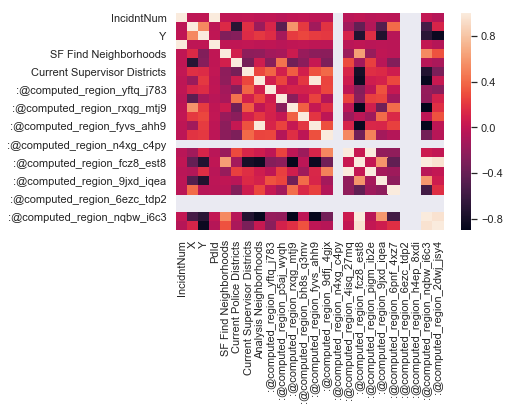

In [11]:
sns.heatmap(corr)

In [12]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
print(pca)

print(df.shape)
    
dummies_cols = ['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution']
drop_cols = ['Date', 'Time', 'Address', 'Location'] #Date and Tme can be handled better
df1 = pd.get_dummies(df, columns=dummies_cols)
df1 = df1.drop(drop_cols, axis=1)
df1 = df1.dropna(axis=0)
X = df1.loc[:,:].values
X_cols = df1.loc[:,:].columns

scaler=StandardScaler()
X_transformed = scaler.fit_transform(X)

pca.fit(X_transformed)
X_pca = pca.fit(X_transformed).transform(X_transformed)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
(2215024, 33)


Text(0, 0.5, 'Explained Variance')

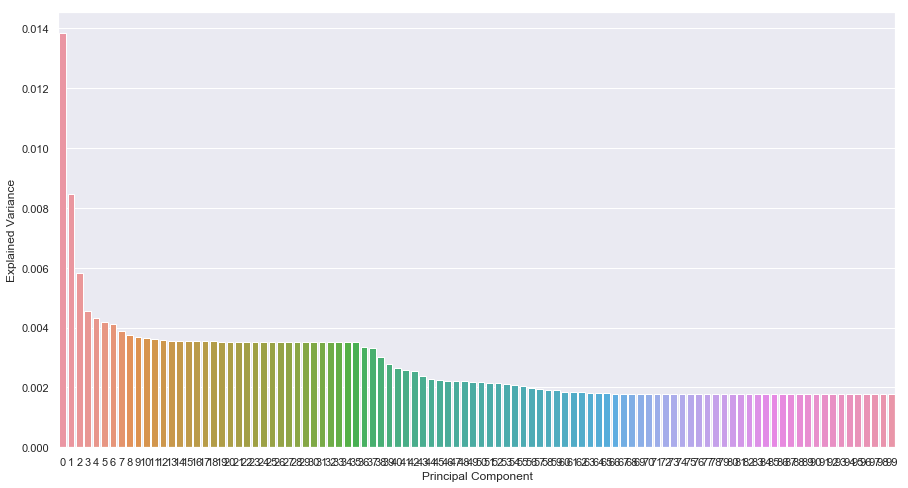

In [13]:
# Explained Variance 
plt.figure(figsize=(15,8))
ax = sns.barplot(x=np.arange(100), y=pca.explained_variance_[0:100]/sum(pca.explained_variance_))
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')

519.0 PCA components explain all variance.
1012.0 total features
0.5128458498023716 % of all features


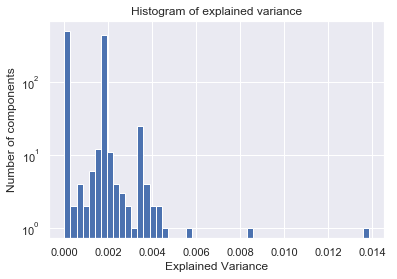

In [14]:
# Histogram of explained variance
vals, bins, patches = plt.hist(pca.explained_variance_/sum(pca.explained_variance_), log=True, bins=50)
plt.title('Histogram of explained variance')
plt.xlabel('Explained Variance')
plt.ylabel('Number of components')

# Observations
num_exp_var = np.sum(vals)-vals[0] #
print(num_exp_var, 'PCA components explain all variance.')
print(np.sum(vals), 'total features')
print(num_exp_var/np.sum(vals), '% of all features')

In [15]:
cols_list = ['Address', 'X', 'Y', 'Location', 'PdId',
       'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods']
for col in cols_list:
    series = df[col]
    series.unique()
    print(col, '- unique entries - ', len(series.unique()))

Address - unique entries -  25147
X - unique entries -  60620
Y - unique entries -  58674
Location - unique entries -  61430
PdId - unique entries -  2215024
SF Find Neighborhoods - unique entries -  118
Current Police Districts - unique entries -  11
Current Supervisor Districts - unique entries -  12
Analysis Neighborhoods - unique entries -  42


In [16]:
for col in df.columns: 
    series = df[col]
    print(len(series.unique()), col)

1746914 IncidntNum
39 Category
915 Descript
7 DayOfWeek
5613 Date
1439 Time
11 PdDistrict
17 Resolution
25147 Address
60620 X
58674 Y
61430 Location
2215024 PdId
118 SF Find Neighborhoods
11 Current Police Districts
12 Current Supervisor Districts
42 Analysis Neighborhoods
16 :@computed_region_yftq_j783
11 :@computed_region_p5aj_wyqh
12 :@computed_region_rxqg_mtj9
30 :@computed_region_bh8s_q3mv
42 :@computed_region_fyvs_ahh9
25 :@computed_region_9dfj_4gjx
2 :@computed_region_n4xg_c4py
26 :@computed_region_4isq_27mq
6 :@computed_region_fcz8_est8
26 :@computed_region_pigm_ib2e
16 :@computed_region_9jxd_iqea
3 :@computed_region_6pnf_4xz7
2 :@computed_region_6ezc_tdp2
2 :@computed_region_h4ep_8xdi
6 :@computed_region_nqbw_i6c3
50 :@computed_region_2dwj_jsy4


In [19]:
df['Resolution'].unique()

array(['NONE', 'ARREST, BOOKED', 'JUVENILE BOOKED',
       'EXCEPTIONAL CLEARANCE', 'UNFOUNDED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'JUVENILE CITED',
       'ARREST, CITED', 'PROSECUTED FOR LESSER OFFENSE',
       'JUVENILE DIVERTED', 'PSYCHOPATHIC CASE', 'NOT PROSECUTED',
       'LOCATED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'JUVENILE ADMONISHED'],
      dtype=object)

In [43]:
df.groupby('Resolution').count()['IncidntNum']

Resolution
ARREST, BOOKED                             524979
ARREST, CITED                              154789
CLEARED-CONTACT JUVENILE FOR MORE INFO        689
COMPLAINANT REFUSES TO PROSECUTE             8089
DISTRICT ATTORNEY REFUSES TO PROSECUTE       7955
EXCEPTIONAL CLEARANCE                        4258
JUVENILE ADMONISHED                          3004
JUVENILE BOOKED                             14158
JUVENILE CITED                               6587
JUVENILE DIVERTED                             694
LOCATED                                     34463
NONE                                      1389500
NOT PROSECUTED                               7720
PROSECUTED BY OUTSIDE AGENCY                 5070
PROSECUTED FOR LESSER OFFENSE                  85
PSYCHOPATHIC CASE                           29185
UNFOUNDED                                   23799
Name: IncidntNum, dtype: int64

In [39]:
df.pivot_table('IncidntNum', index='Resolution', columns='Category', aggfunc='count', margins=True)

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS,All
Resolution,,,,,,,,,,,,,,,,,,,,,
"ARREST, BOOKED",630.0,62809.0,49.0,418.0,12765.0,3702.0,4941.0,97961.0,7471.0,453.0,...,9693.0,34.0,2817.0,6.0,7598.0,8738.0,5064.0,93092.0,13334.0,524979
"ARREST, CITED",17.0,7177.0,1.0,5.0,146.0,2627.0,380.0,9049.0,441.0,60.0,...,161.0,2.0,897.0,2.0,5053.0,2971.0,185.0,885.0,1157.0,154789
CLEARED-CONTACT JUVENILE FOR MORE INFO,2.0,81.0,NaN,NaN,8.0,2.0,NaN,7.0,NaN,1.0,...,2.0,NaN,68.0,NaN,2.0,4.0,3.0,7.0,7.0,689
COMPLAINANT REFUSES TO PROSECUTE,3.0,2126.0,5.0,11.0,298.0,28.0,NaN,49.0,12.0,48.0,...,4.0,NaN,621.0,NaN,56.0,267.0,53.0,21.0,45.0,8089
DISTRICT ATTORNEY REFUSES TO PROSECUTE,NaN,2612.0,14.0,15.0,413.0,9.0,NaN,24.0,6.0,98.0,...,27.0,1.0,406.0,NaN,18.0,191.0,70.0,36.0,94.0,7955
EXCEPTIONAL CLEARANCE,2.0,736.0,6.0,3.0,134.0,10.0,3.0,37.0,7.0,38.0,...,15.0,9.0,276.0,NaN,22.0,84.0,35.0,30.0,39.0,4258
JUVENILE ADMONISHED,9.0,657.0,NaN,NaN,9.0,31.0,NaN,107.0,11.0,NaN,...,9.0,NaN,419.0,NaN,43.0,165.0,5.0,3.0,191.0,3004
JUVENILE BOOKED,31.0,1951.0,1.0,17.0,309.0,37.0,15.0,1094.0,39.0,1.0,...,325.0,NaN,120.0,NaN,72.0,293.0,235.0,1497.0,763.0,14158
JUVENILE CITED,9.0,585.0,NaN,NaN,147.0,36.0,5.0,531.0,10.0,1.0,...,103.0,NaN,60.0,NaN,135.0,731.0,123.0,26.0,262.0,6587


In [23]:
df['Category'].unique()

array(['VEHICLE THEFT', 'NON-CRIMINAL', 'OTHER OFFENSES', 'ROBBERY',
       'DRUG/NARCOTIC', 'LIQUOR LAWS', 'WARRANTS', 'PROSTITUTION',
       'ASSAULT', 'LARCENY/THEFT', 'VANDALISM', 'STOLEN PROPERTY',
       'KIDNAPPING', 'BURGLARY', 'SECONDARY CODES', 'DRUNKENNESS',
       'SUSPICIOUS OCC', 'DRIVING UNDER THE INFLUENCE', 'WEAPON LAWS',
       'FRAUD', 'TRESPASS', 'FAMILY OFFENSES', 'MISSING PERSON',
       'SEX OFFENSES, FORCIBLE', 'RUNAWAY', 'DISORDERLY CONDUCT',
       'FORGERY/COUNTERFEITING', 'GAMBLING', 'BRIBERY', 'EXTORTION',
       'ARSON', 'EMBEZZLEMENT', 'PORNOGRAPHY/OBSCENE MAT', 'SUICIDE',
       'SEX OFFENSES, NON FORCIBLE', 'BAD CHECKS', 'LOITERING',
       'RECOVERED VEHICLE', 'TREA'], dtype=object)

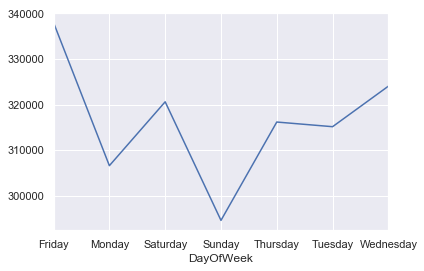

In [33]:
df.groupby('DayOfWeek')['DayOfWeek'].count().plot()

In [18]:
df.count()

IncidntNum                      2215024
Category                        2215024
Descript                        2215024
DayOfWeek                       2215024
Date                            2215024
Time                            2215024
PdDistrict                      2215023
Resolution                      2215024
Address                         2215024
X                               2215024
Y                               2215024
Location                        2215024
PdId                            2215024
SF Find Neighborhoods           2208947
Current Police Districts        2213912
Current Supervisor Districts    2214363
Analysis Neighborhoods          2213967
:@computed_region_yftq_j783     2209444
:@computed_region_p5aj_wyqh     2213501
:@computed_region_rxqg_mtj9     2214363
:@computed_region_bh8s_q3mv     2214529
:@computed_region_fyvs_ahh9     2213967
:@computed_region_9dfj_4gjx      548407
:@computed_region_n4xg_c4py      320205
:@computed_region_4isq_27mq      564496


In [20]:
'''times = pd.to_datetime(df['Time'])
df['times'] = times'''

"times = pd.to_datetime(df['Time'])\ndf['times'] = times"

In [21]:
'''df.pivot_table('IncidntNum', index='DayOfWeek', columns='Category', aggfunc='count')'''

"df.pivot_table('IncidntNum', index='DayOfWeek', columns='Category', aggfunc='count')"

In [22]:
'''vals, bins, patches = plt.hist(df['DayOfWeek'])'''

"vals, bins, patches = plt.hist(df['DayOfWeek'])"